## Python statistics essential training - 03_fitgoodness

Standard imports

In [26]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot

In [27]:
gapminder = pd.read_csv('gapminder.csv')

In [28]:
gdata = gapminder.query('year == 1985')

In [29]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Setting up model fit plot

In [30]:
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Three previous models 

In [31]:
model_region = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [32]:
model_survival = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [33]:
model_survival_by_region = smf.ols(formula = 'babies_per_woman ~ -1 + region + age5_surviving:region', data = gdata).fit()

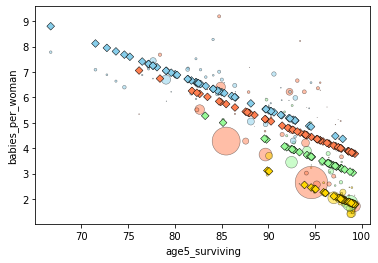

In [34]:
plotfit(model_survival)

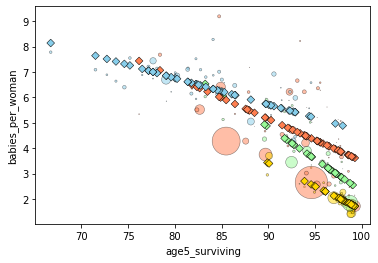

In [35]:
plotfit(model_survival_by_region)

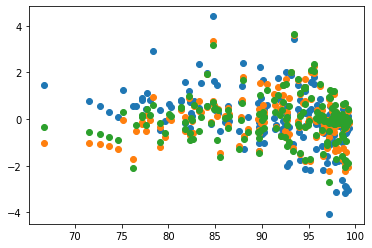

In [36]:
plt.scatter(gdata.age5_surviving,model_region.resid)
plt.scatter(gdata.age5_surviving,model_survival.resid)
plt.scatter(gdata.age5_surviving,model_survival_by_region.resid)

Let's iterate over the three models and look at their measures:

In [37]:
for model in [model_region, model_survival, model_survival_by_region]:
    print(model.mse_resid)

1.4979520263709154
0.9423025333008324
0.8995512597945947


In [38]:
for model in [model_region, model_survival, model_survival_by_region]:
    print(model.rsquared)

0.636467696559659
0.7726009080146058
0.7865971252318769


In [39]:
for model in [model_region, model_survival, model_survival_by_region]:
    print(model.fvalue)

103.88003937611687
150.34180603430977
91.62274469897298


In [40]:
model_survival.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 31 May 2023   Prob (F-statistic):           8.26e-56
Time:                        08:28:12   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* ANOVA

In [41]:
sm.stats.anova_lm(model_region)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


High F-statistics and low p_value shows that the null hypothesis of the model with the included parameters is significant. --> Reject null. 

* H0: All the betas are zero (for the explanatory variables include din this model (region)).
* Ha: At least one is not zero.

In [42]:
sm.stats.anova_lm(model_survival)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [43]:
sm.stats.anova_lm(model_survival_by_region)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1091.572825,4.888881e-122
age5_surviving:region,4.0,110.113541,27.528385,30.602353,2.757693e-19
Residual,174.0,156.521919,0.899551,NaN,NaN


The F-statistics of the most complicated model is lower than the prvious models because the variables are sharing the explanation of the response variable.